In [127]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

url="https://www.iplt20.com/auction"
r=requests.get(url)

soup=BeautifulSoup(r.text,"lxml")
table=soup.find("table",id="t4" , class_="ih-td-tab auction-tbl")

titles=[]
header = table.find_all("th")
for i in header:
    titles.append(i.text.strip())

df = pd.DataFrame(columns=titles)
print(df)

Empty DataFrame
Columns: [TEAM, PLAYER, TYPE, PRICE]
Index: []


In [106]:
data = table.find_all("tr")
for row in data:
    print(row)

<tr class="ih-pt-tbl" style="display:revert">
<th class="skip-filter" style="width:25%;text-align: left;">TEAM</th>
<th class="skip-filter" style="width:25%;">PLAYER</th>
<th class="skip-filter" style="width:25%;">TYPE </th>
<th class="skip-filter" style="width:25%;">PRICE</th>
</tr>
<tr>
<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://documents.iplt20.com/ipl/franchises/1702465948_KKRroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Kolkata Knight Riders</h2>
</div>
</td>
<td>Mitchell  Starc</td>
<td>Bowler</td>
<td>₹24,75,00,000</td>
</tr>
<tr>
<td class="ih-t-color">
<div class="ih-pt-ic">
<div class="ih-pt-img" style="width: 60px">
<img alt="" src="https://documents.iplt20.com/ipl/franchises/1702466366_SRHroundbig.png"/>
</div>
<h2 class="ih-pt-cont">Sunrisers Hyderabad</h2>
</div>
</td>
<td>Pat Cummins</td>
<td>All-Rounder</td>
<td>₹20,50,00,000</td>
</tr>
<tr>
<td class="ih-t-color">
<div class="ih-pt-ic">
<div class

In [133]:
for i in data[1:]:
    rows=i.find_all("td")
    row_data=[tr.text.strip() for tr in rows]
    print(row_data)

['Kolkata Knight Riders', 'Mitchell  Starc', 'Bowler', '₹24,75,00,000']
['Sunrisers Hyderabad', 'Pat Cummins', 'All-Rounder', '₹20,50,00,000']
['Chennai Super Kings', 'Daryl Mitchell', 'All-Rounder', '₹14,00,00,000']
['Punjab Kings', 'Harshal Patel', 'All-Rounder', '₹11,75,00,000']
['Royal Challengers Bengaluru', 'Alzarri Joseph', 'Bowler', '₹11,50,00,000']
['Gujarat Titans', 'Spencer Johnson', 'Bowler', '₹10,00,00,000']
['Chennai Super Kings', 'Sameer Rizvi', 'Batter', '₹8,40,00,000']
['Punjab Kings', 'Rilee Rossouw', 'Batter', '₹8,00,00,000']
['Gujarat Titans', 'Shahrukh Khan', 'All-Rounder', '₹7,40,00,000']
['Rajasthan Royals', 'Rovman Powell', 'Batter', '₹7,40,00,000']


In [108]:
for i in data[1:]:
    rows=i.find_all("td")
    row_data=[tr.text.strip() for tr in rows]

    l=len(df)
    df.loc[l] = row_data
df["PRICE"] = df["PRICE"].str.replace("₹","")
print(df)

                          TEAM           PLAYER         TYPE         PRICE
0        Kolkata Knight Riders  Mitchell  Starc       Bowler  24,75,00,000
1          Sunrisers Hyderabad      Pat Cummins  All-Rounder  20,50,00,000
2          Chennai Super Kings   Daryl Mitchell  All-Rounder  14,00,00,000
3                 Punjab Kings    Harshal Patel  All-Rounder  11,75,00,000
4  Royal Challengers Bengaluru   Alzarri Joseph       Bowler  11,50,00,000
5               Gujarat Titans  Spencer Johnson       Bowler  10,00,00,000
6          Chennai Super Kings     Sameer Rizvi       Batter   8,40,00,000
7                 Punjab Kings    Rilee Rossouw       Batter   8,00,00,000
8               Gujarat Titans    Shahrukh Khan  All-Rounder   7,40,00,000
9             Rajasthan Royals    Rovman Powell       Batter   7,40,00,000


In [109]:
df.to_csv("Scrapped Data from top buys in TATA IPL 2024.csv")

                                              ANALYSIS

In [131]:
df1 = pd.read_csv("Scrapped Data from top buys in TATA IPL 2024.csv")
print(df1[["TEAM", "PLAYER", "TYPE", "PRICE"]])
print(df1["PRICE"].dtype)
print(df1["PLAYER"].dtype)

                          TEAM           PLAYER         TYPE         PRICE
0        Kolkata Knight Riders  Mitchell  Starc       Bowler  24,75,00,000
1          Sunrisers Hyderabad      Pat Cummins  All-Rounder  20,50,00,000
2          Chennai Super Kings   Daryl Mitchell  All-Rounder  14,00,00,000
3                 Punjab Kings    Harshal Patel  All-Rounder  11,75,00,000
4  Royal Challengers Bengaluru   Alzarri Joseph       Bowler  11,50,00,000
5               Gujarat Titans  Spencer Johnson       Bowler  10,00,00,000
6          Chennai Super Kings     Sameer Rizvi       Batter   8,40,00,000
7                 Punjab Kings    Rilee Rossouw       Batter   8,00,00,000
8               Gujarat Titans    Shahrukh Khan  All-Rounder   7,40,00,000
9             Rajasthan Royals    Rovman Powell       Batter   7,40,00,000
object
object


In [111]:
# 1. Total Number of Players per Team
players_per_team = df1.groupby("TEAM").size()
print("\nTotal Number of Players per Team:\n", players_per_team)


Total Number of Players per Team:
 TEAM
Chennai Super Kings            2
Gujarat Titans                 2
Kolkata Knight Riders          1
Punjab Kings                   2
Rajasthan Royals               1
Royal Challengers Bengaluru    1
Sunrisers Hyderabad            1
dtype: int64


In [125]:
#2.Funds spends per team
df1["PRICE"] = df1["PRICE"].astype(str)

df1["PRICE"] = df1["PRICE"].str.replace('₹', '').str.replace(",", "").astype(int)
funds_spent_per_team = df1.groupby("TEAM")["PRICE"].sum()

print("\nTotal Funds Spent per Team:\n", funds_spent_per_team)


Total Funds Spent per Team:
 TEAM
Chennai Super Kings            224000000
Gujarat Titans                 174000000
Kolkata Knight Riders          247500000
Punjab Kings                   197500000
Rajasthan Royals                74000000
Royal Challengers Bengaluru    115000000
Sunrisers Hyderabad            205000000
Name: PRICE, dtype: int32


In [47]:
# 3. Average Price of Players
average_price = df1["PRICE"].mean()
print("\nAverage Price of Players: ₹{:.2f}".format(average_price))


Average Price of Players: ₹123700000.00


In [56]:
# 4. Total and Average Price by Player Type
pd.options.display.float_format = '{:,.2f}'.format
total_by_type = df1.groupby("TYPE")["PRICE"].sum()
avg_by_type = df1.groupby("TYPE")["PRICE"].mean()
print(total_by_type)
print(avg_by_type)

TYPE
All-Rounder    536500000
Batter         238000000
Bowler         462500000
Name: PRICE, dtype: int32
TYPE
All-Rounder   134,125,000.00
Batter         79,333,333.33
Bowler        154,166,666.67
Name: PRICE, dtype: float64


In [64]:
# 5. Highest and Lowest Priced Player per Team
highest_priced_player = df1.loc[df1.groupby("TEAM")["PRICE"].idxmax()]
lowest_priced_player = df1.loc[df1.groupby("TEAM")["PRICE"].idxmin()]
print(highest_priced_player[["TEAM", "PLAYER", "TYPE", "PRICE"]])
print()
print(lowest_priced_player[["TEAM", "PLAYER", "TYPE", "PRICE"]])

                          TEAM           PLAYER         TYPE      PRICE
2          Chennai Super Kings   Daryl Mitchell  All-Rounder  140000000
5               Gujarat Titans  Spencer Johnson       Bowler  100000000
0        Kolkata Knight Riders  Mitchell  Starc       Bowler  247500000
3                 Punjab Kings    Harshal Patel  All-Rounder  117500000
9             Rajasthan Royals    Rovman Powell       Batter   74000000
4  Royal Challengers Bengaluru   Alzarri Joseph       Bowler  115000000
1          Sunrisers Hyderabad      Pat Cummins  All-Rounder  205000000

                          TEAM           PLAYER         TYPE      PRICE
6          Chennai Super Kings     Sameer Rizvi       Batter   84000000
8               Gujarat Titans    Shahrukh Khan  All-Rounder   74000000
0        Kolkata Knight Riders  Mitchell  Starc       Bowler  247500000
7                 Punjab Kings    Rilee Rossouw       Batter   80000000
9             Rajasthan Royals    Rovman Powell       Batter   

In [135]:
# 6. Team-wise Spend per Player Type
spend_by_team_and_type = df1.groupby(["TEAM", "TYPE"])["PRICE"].sum().unstack()
print("\nTeam-wise Spend per Player Type:\n", spend_by_team_and_type)


Team-wise Spend per Player Type:
 TYPE                          All-Rounder       Batter        Bowler
TEAM                                                                
Chennai Super Kings          14,00,00,000  8,40,00,000           NaN
Gujarat Titans                7,40,00,000          NaN  10,00,00,000
Kolkata Knight Riders                 NaN          NaN  24,75,00,000
Punjab Kings                 11,75,00,000  8,00,00,000           NaN
Rajasthan Royals                      NaN  7,40,00,000           NaN
Royal Challengers Bengaluru           NaN          NaN  11,50,00,000
Sunrisers Hyderabad          20,50,00,000          NaN           NaN


In [77]:
spend_by_team_and_type.fillna(0,inplace=True)
spend_by_team_and_type = spend_by_team_and_type.astype(int)
print(spend_by_team_and_type)

TYPE                         All-Rounder    Batter     Bowler
TEAM                                                         
Chennai Super Kings            140000000  84000000          0
Gujarat Titans                  74000000         0  100000000
Kolkata Knight Riders                  0         0  247500000
Punjab Kings                   117500000  80000000          0
Rajasthan Royals                       0  74000000          0
Royal Challengers Bengaluru            0         0  115000000
Sunrisers Hyderabad            205000000         0          0


                                                         VISUALIZING

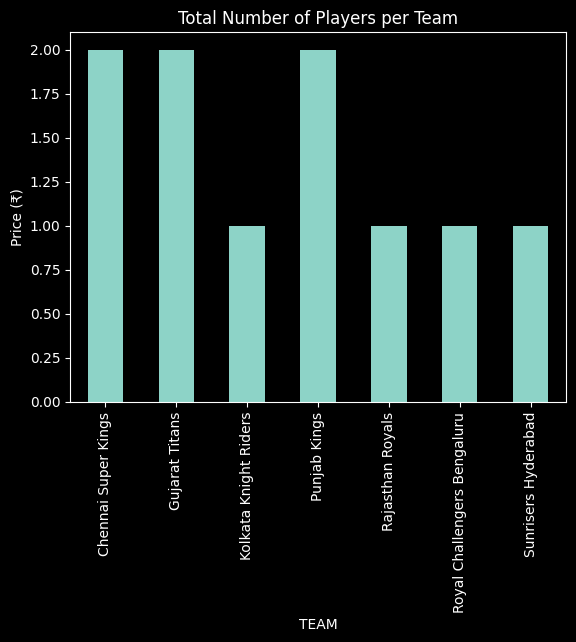

In [88]:
import matplotlib.pyplot as plt
players_per_team.plot(kind='bar', title='Total Number of Players per Team', ylabel='Price (₹)')
plt.show()

<Axes: title={'center': 'Total Funds Spent per Team'}, xlabel='TEAM', ylabel='Price (₹)'>

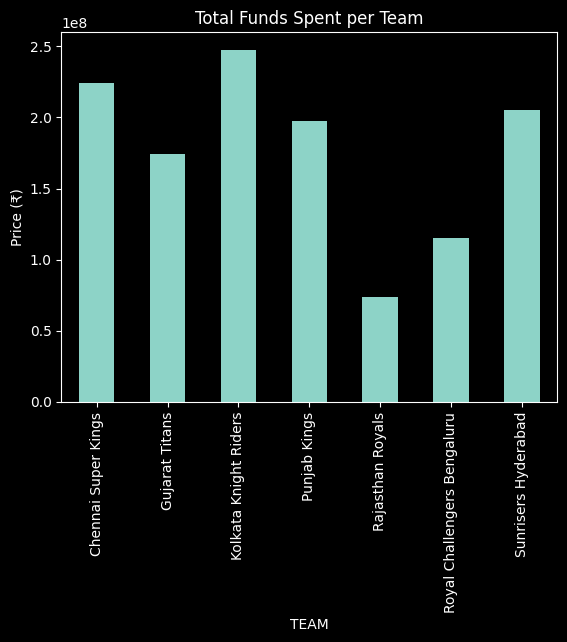

In [79]:
funds_spent_per_team.plot(kind='bar', title='Total Funds Spent per Team', ylabel='Price (₹)')

<Axes: title={'center': 'Distribution of Funds Spent per Team'}, ylabel='PRICE'>

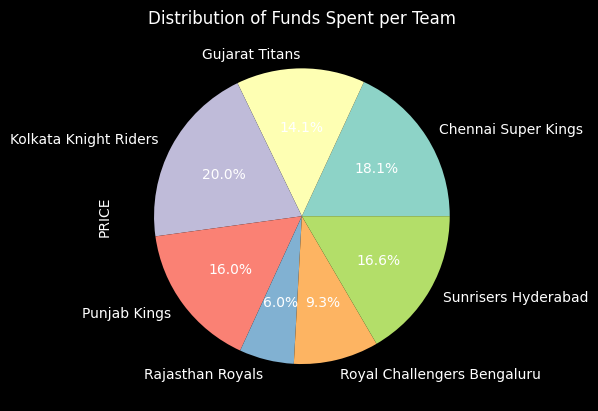

In [84]:
funds_spent_per_team.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Funds Spent per Team')

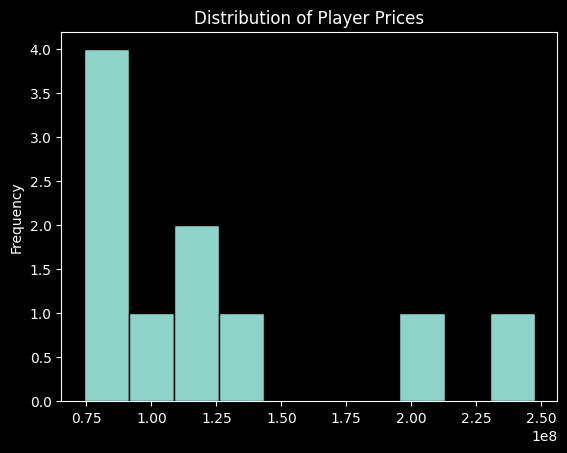

In [144]:
df1["PRICE"] = df1["PRICE"].astype(str) 

df1["PRICE"] = df1["PRICE"].str.replace('₹', '').str.replace(",","").astype(int)
df1["PRICE"].plot(kind='hist', bins=10, title='Distribution of Player Prices', edgecolor='black')
plt.show()

<Axes: title={'center': 'Price vs Player Type'}, xlabel='TYPE', ylabel='PRICE'>

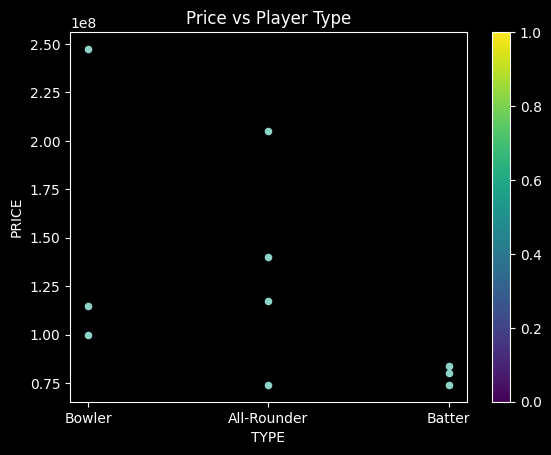

In [95]:
df.plot(kind='scatter', x='TYPE', y='PRICE', title='Price vs Player Type', colorbar="yellow")

<Axes: title={'center': 'Lowest Priced Players per Team'}, xlabel='PLAYER'>

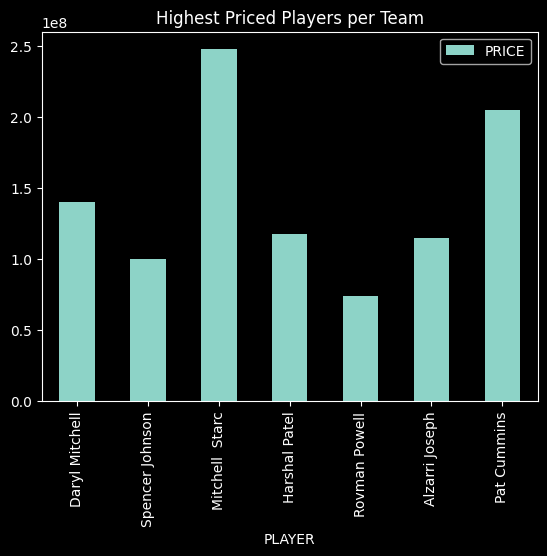

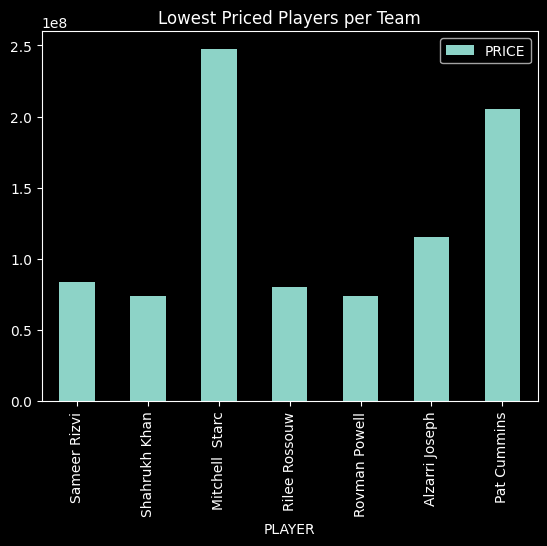

In [96]:
highest_priced_player.plot(kind='bar', x='PLAYER', y='PRICE', title='Highest Priced Players per Team')
lowest_priced_player.plot(kind='bar', x='PLAYER', y='PRICE', title='Lowest Priced Players per Team')